In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_excel("D:\__Works__\Лабы\Stat.Lab-3sem\Сдать графики\\ans_1.xlsx")
data = data[["Левая","Правая"]]
print(data)
left_val = data[['Левая']].to_numpy()
right_val = data[['Правая']].to_numpy()

    Левая  Правая
0    32.5    32.5
1    32.8    31.9
2    31.2    31.6
3    31.5    32.0
4    30.1    30.3
..    ...     ...
56   33.4    33.7
57   33.7    33.3
58   34.7    34.6
59   33.8    34.5
60   33.8    33.7

[61 rows x 2 columns]


In [5]:
#Вид регрессии: y = ax^b

# Преобразование данных в массивы NumPy
left_val = data[['Левая']].to_numpy().reshape(-1, 1)
right_val = data[['Правая']].to_numpy().reshape(-1, 1)

# Построение линейной регрессии для логарифмированных данных
log_left = np.log(left_val)
log_right = np.log(right_val)
reg = LinearRegression().fit(log_left, log_right)
a = np.exp(reg.intercept_)  # Вычисление a
b = reg.coef_[0]  # Вычисление b

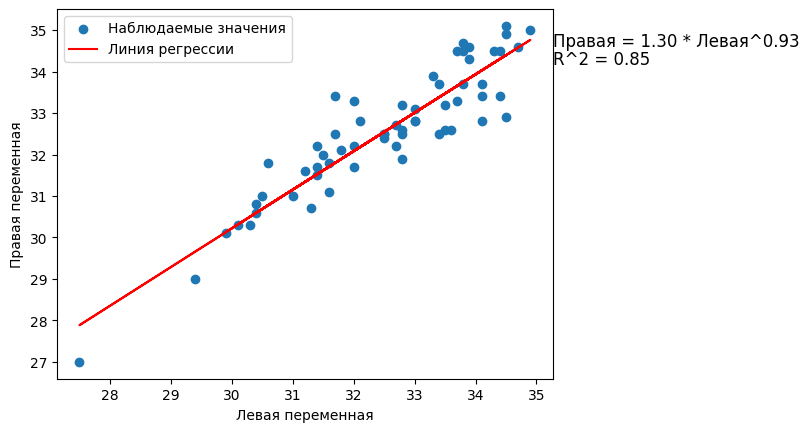

In [6]:
# Предсказание значений правой переменной на основе линейной регрессии
predicted_right = a * left_val**b

# Вычисление коэффициента детерминации
r_squared = reg.score(log_left, log_right)

# Построение графика облака наблюдаемых значений и линии регрессии
plt.scatter(left_val, right_val, label='Наблюдаемые значения')
plt.plot(left_val, predicted_right, color='red', label='Линия регрессии')
plt.xlabel('Левая переменная')
plt.ylabel('Правая переменная')
plt.legend()

# Вывод уравнения регрессии и коэффициента детерминации
equation = f'Правая = {a.item():.2f} * Левая^{b.item():.2f}'
r_squared_text = f'R^2 = {r_squared:.2f}'
plt.text(1, 0.9, equation, transform=plt.gca().transAxes, fontsize=12)
plt.text(1, 0.85, r_squared_text, transform=plt.gca().transAxes, fontsize=12)

# Отображение графика
plt.show()